![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

# Integrando funções menos regulares

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def midpoint(f, a, b, n=1000):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = l + h/2
    return np.sum(f(mids)) * h

def simpson(f, a, b, n=1000):
    l, h = np.linspace(a, b, num=n, endpoint=False, retstep=True)
    mids = l + h/2
    return ( 4*np.sum(f(mids)) + 2*np.sum(f(l)) + (f(b) - f(a)) ) * h/6

In [3]:
def f(x):
    return np.abs(np.sin(x))

## Questão 1: Primitiva

Dê uma primitiva analítica de $f$.

Dica: use a função `divmod` do python.

In [4]:
def F(x):
    int, float = divmod(x, np.pi)
    return (2*int) + ( -np.cos(float) )+1

In [5]:
assert np.isclose(F(10+0.1), F(10) + 0.1 * f(10), atol=1e-2)

In [6]:
assert np.isclose(F(2+0.01), F(2) + 0.01 * f(2), atol=1e-4)

In [7]:
ts = np.linspace(0,10, num=200)
Fts = F(ts)
assert np.all(Fts[1:] > Fts[:-1])

## Questão 2: Erros

Faça um gráfico dos erros de integração de $f$
pelos métodos do ponto médio e Simpson, no intervalo $[0,3]$

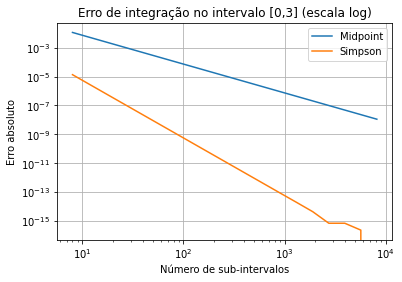

In [8]:
a, b = 0, 3
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

y_mid = [abs(midpoint(f, a, b, i) - exact) for i in ns]
y_simp = [abs(simpson(f, a, b, i) - exact) for i in ns]

plt.loglog(ns, y_mid, label='Midpoint')
plt.loglog(ns, y_simp, label='Simpson')
plt.legend()
plt.grid()
plt.title('Erro de integração no intervalo [0,3] (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

In [9]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

Agora, repita o gráfico para o intervalo $[0,6]$:

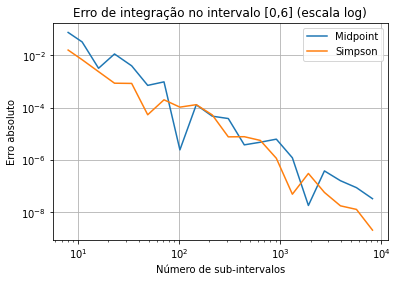

In [10]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

y_mid = [abs(midpoint(f, a, b, i) - exact) for i in ns]
y_simp = [abs(simpson(f, a, b, i) - exact) for i in ns]

plt.loglog(ns, y_mid, label='Midpoint')
plt.loglog(ns, y_simp, label='Simpson')
plt.legend()
plt.grid()
plt.title('Erro de integração no intervalo [0,6] (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

In [11]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [12]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Como esse gráfico é diferente do outro?

De cara percebe-se que no intervalo [0,3] conforme a quantidade de intervalos de integração aumenta, o erro diminui linearmente, já no intervalo [0,6] percebe-se uma irregularidade em ambos os métodos, porém numa visão geral o erro também decresce ao passo que N aumenta. 

Podemos notar também uma diferença no tamanho do erro, no intervalo [0,3] o método de simpson rápidamente chega na precisão da máquina, enquanto que no intervalo [0,6] o erro chega no fim do gráfico em aproximadamente 1e-9. No método do pto médio também houve uma perda de precisão no intervalo maior [0,6], porém bem mais sutil.

Faça para mais um intervalo.

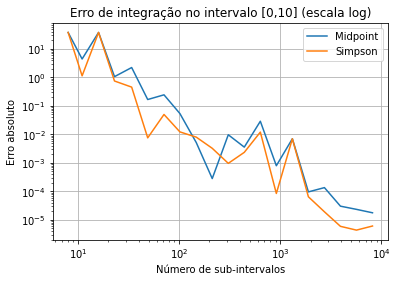

In [13]:
a, b = 0, 100
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

y_mid = [abs(midpoint(f, a, b, i) - exact) for i in ns]
y_simp = [abs(simpson(f, a, b, i) - exact) for i in ns]

plt.loglog(ns, y_mid, label='Midpoint')
plt.loglog(ns, y_simp, label='Simpson')
plt.legend()
plt.grid()
plt.title('Erro de integração no intervalo [0,10] (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

Como isso ajuda a explicar o que você viu?

Analisando o comportamente nos 3 intervalos pode-se perceber que, conforme o intervalo de integração aumenta o erro também aumenta. O que é esperado, pois o tamanho de cada intervalo é h, que por sua vez é dado por (b-a)/n, logo, utilizando um n fixo para diferentes intervalos, quanto maior for o intervalo, maior será o h, e consequentemente maior será o erro.

## Questão 3: Encontrando o intervalo contendo $\pi$

Como $|\sin(x)|$ não é derivável em $\pi$, vamos ver quanto erro tem no sub-intervalo que "atravessa" $\pi$.

Escreva a função `I_x(a, b, x, n)` que retorna o intervalo contendo $x$ ao dividir $[a,b]$ em $n$ partes.

In [14]:
def I_x(a, b, x, n):
    """The interval  [xi, xi+h]  containing  x, when  [a,b]  is divided in  n  equal parts.
    Returns  None  if  x  is outside  [a,b]"""
    h = (b-a)/n
    if (x-a)*(x-b) > 0:
        return None
    for i in range(n):
        if x >= a + (i*h) and x <= a + (i*h) + h:
            return i*h, (i*h)+h

In [15]:
l, r = I_x(0, 6, np.pi, 10)
assert np.isclose(l, 3)
assert np.isclose(r, 3.6)

In [16]:
l, r = I_x(0, 60, np.pi, 10)
assert l <= np.pi <= r

In [17]:
l, r = I_x(0, 1, 0.4, 36)
assert l < 0.4 < r

Agora, faça o gráfico do erro de integração pelos métodos do ponto médio e de Simpson
apenas no intervalo contendo a "discontinuidade" $\pi$,
em função de $n$.

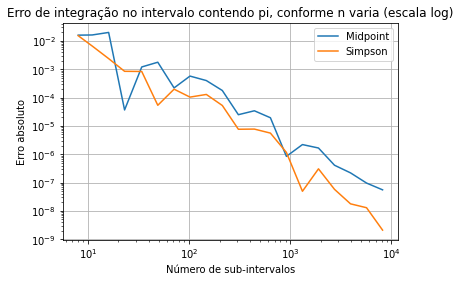

In [18]:
ns = np.logspace(3,13, num=20, dtype=int, base=2)

def mid(f):
    list = []
    exact = []
    for n in ns:
        a,b = I_x(0, 6, np.pi, n)
        list.append(midpoint(f, a, b, 1))
        exact.append(F(b) - F(a))  
        
    k = np.array(list)
    j = np.array(exact)    
    return abs(k - j) 

def simp(f):
    list = []
    exact = []
    for n in ns:
        a,b = I_x(0, 6, np.pi, n)
        list.append(simpson(f, a, b, 1))
        exact.append(F(b) - F(a))
        
    k = np.array(list)
    j = np.array(exact)    
    return abs(k - j) 

y_mid = mid(f)
y_simp = simp(f)

plt.loglog(ns, y_mid, label='Midpoint')
plt.loglog(ns, y_simp, label='Simpson')
plt.legend()
plt.grid()
plt.title('Erro de integração no intervalo contendo pi, conforme n varia (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

In [19]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [20]:
for l in ax.lines:
    assert 1e-10 < min(l.get_ydata()) < 1e-7

Quanto do erro de cada método é causado pelo erro em apenas um intervalo?

Faça um gráfico comparando esses erros

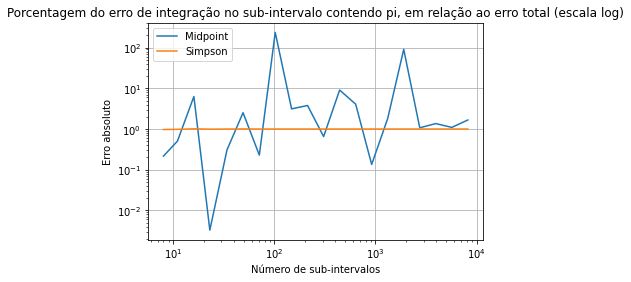

In [27]:
a, b = 0, 6
exact = F(b) - F(a)
ns = np.logspace(3,13, num=20, dtype=int, base=2)

y_I_mid = mid(f)
y_I_simp = simp(f)
y_mid = [abs(midpoint(f, a, b, i) - exact) for i in ns]
y_simp = [abs(simpson(f, a, b, i) - exact) for i in ns]
a = y_I_mid/y_mid
b = y_I_simp/y_simp

plt.loglog(ns, a, label='Midpoint')
plt.loglog(ns, b, label='Simpson')
plt.legend()
plt.grid()
plt.title('Porcentagem do erro de integração no sub-intervalo contendo pi, em relação ao erro total (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

Mude a integral de $[0,6]$ por duas integrais, uma em $[0,\pi]$ e outra em $[\pi,6]$.
Faça um gráfico comparando os erros dos 4 métodos:
- Ponto médio vs Simpson
- Integral única vs Integral em 2 partes

Cuide de usar o mesmo número $n$ total de sub-intervalos, para não "roubar" em favor do que usa 2 intervalos :-)

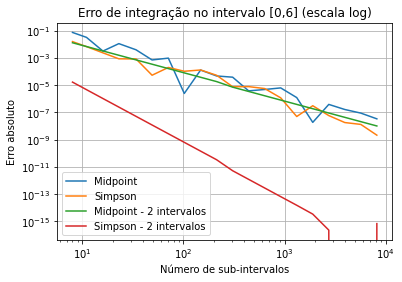

In [22]:
a, c, b = 0, np.pi, 6

exact = F(b) - F(a)
exact_1 = F(np.pi) - F(a)
exact_2 = F(b) - F(np.pi)

ns = np.logspace(3,13, num=20, dtype=int, base=2)
ns_mid = len(ns)//2
ns_1 = ns[:ns_mid]
ns_2 = ns[ns_mid:]

y_mid = [abs(midpoint(f, a, b, i) - exact) for i in ns]
y_simp = [abs(simpson(f, a, b, i) - exact) for i in ns]

y_mid_1 = [abs(midpoint(f, a, np.pi, i) - exact_1) for i in ns_1]
y_simp_1 = [abs(simpson(f, a, np.pi, i) - exact_1) for i in ns_1]

y_mid_2 = [abs(midpoint(f, np.pi, b, i) - exact_2) for i in ns_2]
y_simp_2 = [abs(simpson(f, np.pi, b, i) - exact_2) for i in ns_2]

plt.loglog(ns, y_mid, label='Midpoint')
plt.loglog(ns, y_simp, label='Simpson')
plt.loglog(ns, y_mid_1+y_mid_2, label='Midpoint - 2 intervalos')
plt.loglog(ns, y_simp_1+y_simp_2, label='Simpson - 2 intervalos')
plt.legend()
plt.grid()
plt.title('Erro de integração no intervalo [0,6] (escala log)')
plt.xlabel('Número de sub-intervalos')
plt.ylabel('Erro absoluto')
ax = plt.gca();

In [23]:
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

O que você observa?
O que você conclui?

Pode-se observar que aumentando o número de integrais, ganha-se precisão em ambos os métodos, mesmo utilizando o mesmo número de sub-intervalos. Observa-se ainda que no método do pto médio usando 2 integrais, o erro tem um decrescimento uniforme à medida que N aumenta, diferente de quando se usa apenas 1 integral, cujo erro tem variações perceptíveis. O que fica mais gritante no último gráfico é a velocidade de congergência do erro usando 2 integrais no método de simpson, chegando à precisão da máquina com menos de 1e4 sub-intervalos.

Também vemos que no sub-intervalo contendo pi, o método de simpson possui sempre um erro equivalente ao erro total, já no método do pto médio o erro do sub-intervalo varia conforme o N, estando hora com valores maiores que o erro total e hora menores.